### K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from numpy import *
from matplotlib import cm
from sklearn import metrics
from sklearn.metrics import silhouette_samples, completeness_score, homogeneity_score
from sklearn.cluster import KMeans 
from sklearn.datasets import fetch_california_housing, load_iris

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(suppress = True, precision = 2, linewidth = 120)

Clustering with California Housing Data

In [2]:
# Fetch the dataset
housing = fetch_california_housing()
print(housing.data[:5])

[[   8.33   41.      6.98    1.02  322.      2.56   37.88 -122.23]
 [   8.3    21.      6.24    0.97 2401.      2.11   37.86 -122.22]
 [   7.26   52.      8.29    1.07  496.      2.8    37.85 -122.24]
 [   5.64   52.      5.82    1.07  558.      2.55   37.85 -122.25]
 [   3.85   52.      6.28    1.08  565.      2.18   37.85 -122.25]]


In [3]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
# Create a Pandas DataFrame
data = pd.DataFrame(housing.data, columns = housing.feature_names)
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23
1,8.30,21.00,6.24,0.97,"2,401.00",2.11,37.86,-122.22
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25


In [5]:
kmeans = KMeans(n_clusters = 5, max_iter = 500, verbose = 0) # Initialize the K-Means clustering
kmeans.fit(data) # Fit the model
clusters = kmeans.predict(data) # Predict the clusters

c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [6]:
dfCluster = pd.DataFrame(clusters, columns = ["Cluster"])
dfCluster.value_counts() # Count the number of occurrences of each cluster label

Cluster
1          10120
3           7608
0           2378
2            480
4             54
Name: count, dtype: int64

In [7]:
# Create centroids from the K-Means
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = housing.feature_names)
centroids

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.80,21.84,5.08,1.07,"2,865.48",3.22,35.21,-119.21
1,3.93,31.77,5.67,1.13,740.71,2.78,35.88,-119.77
2,4.09,15.60,5.40,1.07,"5,447.96",8.66,35.21,-119.09
3,3.79,27.55,5.21,1.06,"1,564.76",3.05,35.46,-119.45
4,4.70,9.46,6.15,1.08,"11,208.44",4.83,34.92,-118.74


In [8]:
def cluster_sizes(clusters):
    
    # Initialize an empty dictionary to store the size of each cluster
    size = {}

    # Get the unique cluster labels
    cluster_labels = np.unique(clusters)

    # Determine the number of unique clusters
    n_clusters = cluster_labels.shape[0]

    # Count how many data points belong to each cluster and store this count in the dictionary
    for c in cluster_labels:
        size[c] = len(data[clusters == c])
        
    return size

In [9]:
# Call the function
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "=", size[c])

Size of Cluster 0 = 2378
Size of Cluster 1 = 10120
Size of Cluster 2 = 480
Size of Cluster 3 = 7608
Size of Cluster 4 = 54


In [10]:
# Calculate the silhouette scores
silhouettes = metrics.silhouette_samples(data, clusters)
print(silhouettes.mean())

0.5500732185116821


In [11]:
def plot_silhouettes(data, clusters):
    
    # Get the unique cluster labels and the number of clusters
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    # Calculate the silhouette values
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric = 'euclidean')
    
    # Initialize variables to track the lower and upper bounds
    c_ax_lower, c_ax_upper = 0, 0

    # List to store the tick positions for cluster labels
    cticks = []

    for i, k in enumerate(cluster_labels):

        # Get the silhouette values for the current cluster 'k'
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()

        # Calculate the upper bound
        c_ax_upper += len(c_silhouette_vals)

        # Plot the horizontal bars for the current cluster's silhouette values
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)

        # Append the center position for the current cluster
        cticks.append((c_ax_lower + c_ax_upper) / 2)

        # Update the lower bound
        c_ax_lower += len(c_silhouette_vals)
    
    # Calculate the average silhouette score
    silhouette_avg = np.mean(silhouette_vals)

    # Plot a vertical line at the average silhouette score
    pl.axvline(silhouette_avg, color = "red", linestyle = "--") 
    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette Coefficient')
    pl.tight_layout()
    pl.show()
    
    return

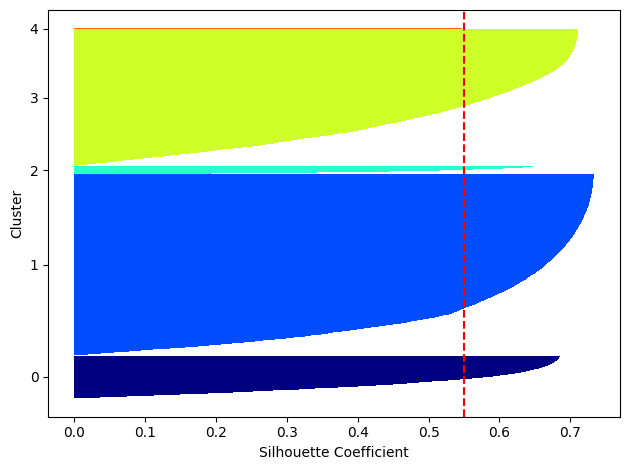

In [12]:
# Call the function
plot_silhouettes(data, clusters)

Clustering with Iris Plant Data

In [13]:
# Load the dataset
iris = load_iris()

In [14]:
data = iris.data # Extract the feature data
target = iris.target # Extract the target labels

In [15]:
irisDF = pd.DataFrame(data, columns = iris.feature_names)
irisDF.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


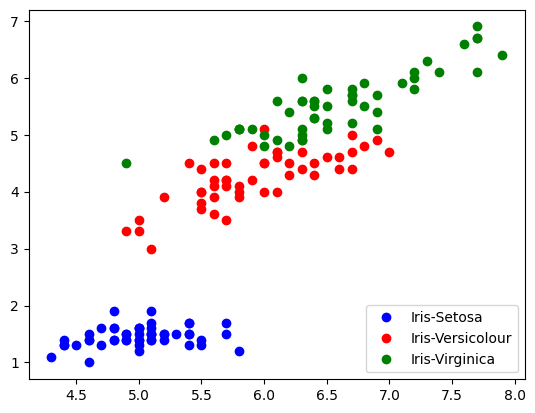

In [16]:
# Plot the data points for each species of iris flower
pl.plot(data[target == 0, 0], data[target == 0, 2], 'bo')
pl.plot(data[target == 1, 0], data[target == 1, 2], 'ro')
pl.plot(data[target == 2, 0], data[target == 2, 2], 'go')
pl.legend(('Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'), loc = 4)
pl.show()

In [17]:
iris_kmeans = KMeans(n_clusters = 3, max_iter = 500, verbose = 0, n_init = 5) # Initialize the K-Means clustering
iris_kmeans.fit(irisDF) # Fit the model
clusters = iris_kmeans.predict(data) # Predict the clusters

c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [18]:
# Call the function
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "=", size[c])

Size of Cluster 0 = 62
Size of Cluster 1 = 50
Size of Cluster 2 = 38


In [19]:
# Create centroids from the K-Means
iris_centroids = pd.DataFrame(iris_kmeans.cluster_centers_, columns = iris.feature_names)
iris_centroids

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.90,2.75,4.39,1.43
1,5.01,3.43,1.46,0.25
2,6.85,3.07,5.74,2.07


In [20]:
# Calculate the completeness score
print(completeness_score(target, clusters))

0.7649861514489815


In [21]:
# Calculate the homogeneity score
print(homogeneity_score(target, clusters))

0.7514854021988338


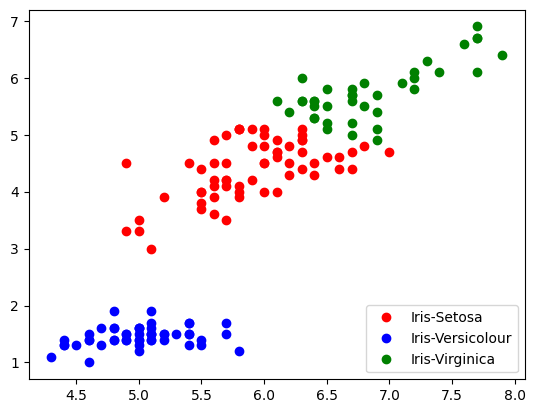

In [22]:
# Plot the clustered data points based on the clustering results
pl.plot(data[clusters == 0, 0], data[clusters == 0, 2], 'ro')
pl.plot(data[clusters == 1, 0], data[clusters == 1, 2], 'bo')
pl.plot(data[clusters == 2, 0], data[clusters == 2, 2], 'go')
pl.legend(('Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'), loc = 4)
pl.show()

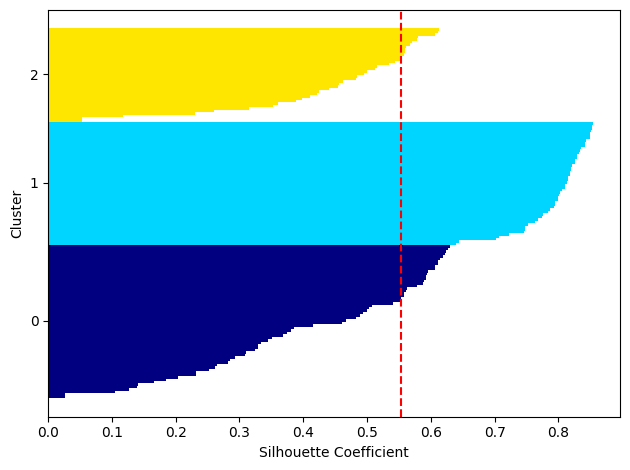

In [23]:
# Call the function
plot_silhouettes(data, clusters)

kMeans module of the MLA book

In [24]:
def distEuclid(vecA, vecB):

    return sqrt(sum(power(vecA - vecB, 2)))

In [25]:
def distCosine(vecA, vecB):

    A_norm = np.linalg.norm(vecA)
    B_norm = np.linalg.norm(vecB)
    sims = np.dot(vecA,vecB)/(A_norm * B_norm)
    dists = 1 - sims
 
    return dists

In [26]:
def randCent(dataSet, k):

	n = shape(dataSet)[1]
	centroids = zeros((k, n), dtype = float)
	
	for j in range(n):
		minJ = min(dataSet[:, j])
		rangeJ = float(max(dataSet[:, j]) - minJ)
		centroids[:, j] = minJ + rangeJ * random.rand(k)

	return centroids 

In [27]:
def kMeans(dataSet, k, distMeas = distEuclid, createCent = randCent):

    m = shape(dataSet)[0]
    clusterAssment = zeros((m, 2))
    centroids = createCent(dataSet, k)
    clusterChanged = True

    while clusterChanged:
        clusterChanged = False

        for i in range(m):
            minDist = inf
            minIndex = -1
            
            for j in range(k):
                distJI = distMeas(centroids[j, :], dataSet[i, :])

                if distJI < minDist:
                    minDist = distJI
                    minIndex = j

            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            
            clusterAssment[i, :] = minIndex, minDist ** 2

        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[:, 0] == cent)[0]]

            if(len(ptsInClust) != 0):
                centroids[cent, :] = mean(ptsInClust, axis = 0)
                
    return centroids, clusterAssment

In [28]:
def biKmeans(dataSet, k, distMeas = distEuclid):

    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroid0 = mean(dataSet, axis = 0).tolist()[0]
    centList =[centroid0]
    
    for j in range(m):
        clusterAssment[j, 1] = distMeas(mat(centroid0), dataSet[j, :]) ** 2

    while (len(centList) < k):
        lowestSSE = inf

        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:, 0].A == i)[0], :]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:, 1])
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:, 0].A != i)[0], 1])
            print("sseSplit and notSplit:", sseSplit, sseNotSplit)

            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit

        bestClustAss[nonzero(bestClustAss[:, 0] == 1)[0], 0] = len(centList)
        bestClustAss[nonzero(bestClustAss[:, 0] == 0)[0], 0] = bestCentToSplit
        print('The bestCentToSplit is:', bestCentToSplit)
        print('The len of bestClustAss is:', len(bestClustAss))
        
        centList[bestCentToSplit] = bestNewCents[0, :].tolist()[0]
        centList.append(bestNewCents[1, :].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:, 0].A == bestCentToSplit)[0], :] = bestClustAss

    return mat(centList), clusterAssment

In [29]:
# Convert to a NumPy array
data = np.array(data)

In [30]:
# Perform k-means clustering
centroids, clusters = kMeans(data, 3, distCosine, randCent)
pd.DataFrame(centroids, columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.01,3.43,1.46,0.25
1,6.52,2.97,5.48,1.99
2,5.95,2.76,4.20,1.30


In [31]:
# Create a DataFrame to hold the cluster assignments and the minimum squared distance for each data point
iris_clusters = pd.DataFrame(clusters, columns = ["Cluster", "MinDistance ** 2"])
iris_clusters.head(10)

,Cluster,MinDistance ** 2
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00
9,0.00,0.00


In [32]:
# Convert the column to integer type
newC = iris_clusters["Cluster"].astype(int)

In [33]:
# Calculate the completeness score of the clustering results
print(completeness_score(target, newC))

0.9010648908640206


In [34]:
# Calculate the homogeneity score of the clustering results
print(homogeneity_score(target, newC))

0.8983263672602775


In [35]:
# Perform bi-sectional K-means clustering
centroids_bk, clusters_bk = biKmeans(data, 3, distEuclid)

sseSplit and notSplit: 152.34795176035794 0.0
The bestCentToSplit is: 0
The len of bestClustAss is: 150
sseSplit and notSplit: 15.257666666666667 123.79587628865981
sseSplit and notSplit: 55.7041081081081 28.552075471698114
The bestCentToSplit is: 1
The len of bestClustAss is: 97


In [36]:
bkC = clusters_bk.T[0] # Transpose clusters_bk and select the first row
bkC = bkC.astype(int) # Convert the cluster assignments to integers
bkC = np.ravel(bkC) # Flatten the array to a 1D array
print(bkC)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2
 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1]


In [37]:
# Calculate the completeness score of the clustering results
print(completeness_score(target, bkC))

0.6901740871540514


In [38]:
# Calculate the homogeneity score of the clustering results
print(homogeneity_score(target, bkC))

0.6780843144285856
